## Analiza prometnih nesreč v Sloveniji
====================================

Projekt pri predmetu Podatkovno rudarjenje
------------------------------------------


V projektni nalogi obravnavam problematiko prometnih nesreč v Sloveniji. V ta
namen sem analiziral podatke prometnih nesreč, ki so javno dostopni in sem jih pridobil na spletni strani
slovenske policije
<https://www.policija.si/o-slovenski-policiji/statistika/prometna-varnost>.
Osredotočil se bom na analizo prometnih nesreč, kot tudi na udeležence prometnih
nesreč. V analizi bom predstavil kateri dejavniki vplivajo na prometne nesreče.

DOMENA
====
Podatki o prometnih nesrečah lahko uporabljamo za vrsto najrazličnejših analiz. Z nadaljnim delom nad podatki o prometnih nesrečah lahko določimo t.i. vroče točke na cestnih odsekih. Objava tako obdelanih podatkov bi nas lahko opozarjala pri naši vožnji, da prihajamo na območje povečanega tveganja in naj bomo previdni. Več ljudi, ki bodo uporabljali podatke, več različnih idej bo nastalo. In s tem se samo bogati naše znanje in se povečuje kakovost življenja.

Zmanjševanje prometnih nesreč je pomembno področje za izboljšanje varnosti v prometu in kakovosti bivanja. Na prometne nesreče vpliva vrsta dejavnikov kot so voznik, vozniške izkušnje, vozilo, cesta, vremenske razmere in ostali faktorji. Ti lahko ali posamično ali pa skupaj igrajo pomembno vlogo pri vplivu na pojav prometne nesreče

**Glavna vprašanja skozi analizo podatkov** - Kako vpliva prisotnost in stopnja alkohola na prometne nesreče po različnih dimenzijah? - Kako vpliva starost povzročitelja na prometne nesreče? - Kako vpliva vozniški stalež na prometne
nesreče? - Ali vpliva število potnikov na prometno nesrečo? Se več nesreč zgodi, ko je v nesreči prisotna ena oseba, ali več nesreč ko je v avtomobilu prisotnih več oseb? - Ali so se v zadnjih letih zgodile množične nesreče? Kaj je bil
poglavitni razlog za množične nesreče? - Kako vplivajo vremenske razmere na prometne nesreče po različnih dimenzijah?

OPIS PODATKOV
=============



Podatki o prometnih nesrečah so dostopni na javni spletni strani slovenkse policije. Datoteke so v csv obliki, ločeni z podpičjem(;) ter poimenovane PN[leto prometnenesreče].csv. Na spletni strani so shranjene v obliki zip datotek.

**Opis podatkov prometnih nesreč**

Struktura podatkovne baze prometnih nesreč

(PN): - številka za štetje in ločevanje posamezne prometne nesreče -
klasifikacija nesreče glede na posledice (Izračuna se avtomatično glede na
najhujšo posledico pri udeležencih v prometni nesreči) - upravna enota, na
območju katere se je zgodila prometna nesreča - datum nesreče (format:
dd.mm.llll)  - ura nesreče (format: hh)  - indikator ali se je nesreča zgodila v
naselju (D) ali izven (N) - lokacija nesreče - vrsta ceste ali naselja na kateri
je prišlo do nesreče - oznaka ceste ali šifra naselja kjer je prišlo do nesreče
- tekst ceste ali naselja, kjer je prišlo do nesreče - oznaka odseka ceste ali
šifra ulice, kjer je prišlo do nesreče - tekst odseka ali ulice, kjer je prišlo
do nesreče - točna stacionaža ali hišna številka, kjer je prišlo do nesreče -
opis prizorišča nesreče - glavni vzrok nesreče - tip nesreče - vremenske
okoliščine v času nesreče - stanje prometa v času nesreče - stanje vozišča v
času nesreče - stanje površine vozišča v času nesreče - Geo Koordinata X
(Gauß-Krüger-jev koordinatni sistem) - Geo Koordinata Y (Gauß-Krüger-jev
koordinatni sistem) - številka za štetje in ločevanje oseb, udeleženih v
prometnih nesrečah - kot kaj nastopa oseba v prometni nesreči - starost osebe
(LL) - spol - upravna enota stalnega prebivališča - državljanstvo osebe -
poškodba osebe - vrsta udeleženca v prometu - ali je oseba uporabljala varnostni
pas ali čelado (polje se interpretira v odvisnosti od vrste udeleženca) (Da/Ne)
- vozniški staž osebe za kategorijo, ki jo potrebuje glede na vrsto udeleženca v
prometu (LL) - vozniški staž osebe za kategorijo, ki jo potrebuje glede na vrsto
udeleženca v prometu (MM) - vrednost alkotesta za osebo, če je bil opravljen
(n.nn) - vrednost strokovnega pregleda za osebo, če je bil odrejen in so
rezultati že znani (n.nn)


<img src=\"files/strukturapodatkov.png\"></img>



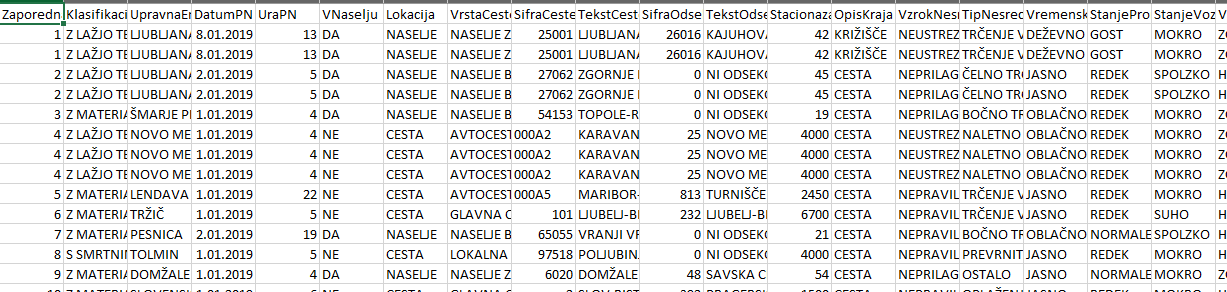

In [18]:
from IPython.display import Image, display
display(Image(filename='files/strukturapodatkov.png', embed=True))

**Število prebivalcev po upravnih enotah**

Zaradi boljšega razumevanja prometnih nesreč se mi zdi pomembno, da se poleg
samih nesreč preveri tudi druge podatkovne baze s pomočjo katerih dobimo boljši
občutek prometnih nesreč. Za ta namen sem iz Statističnega urada Republike
Slovenije pridobil podatke o številu prebivalcev po upravnih enotah. Podatke sem
pridobil na spletni strani
<https://pxweb.stat.si/pxweb/Dialog/varval.asp?ma=05C3002S&ti=&path=../Database/Dem_soc/05_prebivalstvo/10_stevilo_preb/15_05C30_prebivalstvo_upravne/&lang=2>

![alt text](files/strukturapodatkovSTAT.png "test")

**Vremenski podatki v Republiki Sloveniji**
Na začetku projekta sem predvideval tudi uporabo vremenskih podatkov, ki bi jih pridobil iz spletne strani ARSO, vendar sem ugotovil, da podatke ni tako enostavno zajemati. Namreč, ARSO nima funkcionalnosti strojnega zajemanja zgodovinskih podatkov. Za vsako vremensko postajo bi moral podatke v tem primeru pridobiti ročno. Zato jih v tem trenutku nisem uporabil. Zagotovo pa je to nekaj, kar bi lahko uporabili v prihodnosti, sploh pri predvidevanju prometnih nesreč glede na vremenske vplive.

PRIPRAVA PODATKOV
=========================

Podatki prometnih nesreč v Sloveniji so shranjeni v različnih datotekah na spletni strani. Za potrebe nadaljnjih analiz je potrebno podatke združiti v eno datoteko. Zaradi optimizacije in možnosti pridobivanja podatkov v prihodnosti sem pripravil proceduro, s pomočjo katere podatke pridobimo iz spleta. Za potrebe analiz sem se odločil za prometne nesreče od leta 2010 naprej.

Čiščenje podatkov
-----------------

Podatkovna baza prometnih nesreč je pripravljena v obliki, ki ni najbolj primerna za napredne analize, zato je potrebno podatke ustrezno pripraviti.
Izziv, ki sem ga zasledil je bila skupna podatkovna baza za nesreče in udeležence nesreč. V ta namen je potrebno ob analizi prometnih nesreč – štetje prometnih nesreč upoštevati razlikovalno štetje prometnih nesreč po atributu *ZaporednaStevilkaPN.* Poleg tega se vsako leto začne štetje od začetka, zato je potrebno za ustrezno analizo podatke pripraviti na način, da kombiniramo *ZaporednaStevilkaPN in Leto.*
V primeru analize udeležencev prometnih nesreč ni potrebe po razlikovalnem štetju, temveč se uporabi normalno štetje.

Za ustrezno analizo sem naredil nekaj dodatnih značilk, s katerimi lahko enostavneje pregledujemo prometne nesreče. Poleg obstoječih značilk imamo tako na voljo še: novi datumski atributi (leto, mesec, dan, dan v tednu), Ureditev starostnih razredov udeležencev prometnih nesreč (\<16', '16-18','18-21','21-50', '50-65', '65+), Ureditev razredov za stalež vozniškega dovoljenja (\<2', '2-5', '5-10', '10-20', '20-30', '30+), Pretvorba lokacijskih koordinat (Gauss-Krugerjev koordinatni sistem v lon, lat), 
ureditev razreda državljanstev (domači, tujci), smrtni izid, vinjena oseba, prometna konica, ter ostale.

Glavne ugotovitve
=================

**Kako se število prometnih nesreč spreminja po letih?**
Po podatkih sodeč število prometnih nesreč z leti pada. Razen v zadnjem letu se je število nesreč povečalo. Pri tej ugotovitvi bi me zanimalo, ali policija res spremlja prometne nesreče po isti metodologiji vsa leta. Podatki kažejo zelo čudno krivuljo, saj se promet na cestah povečuje. 

![alt text](files/SteviloNesrecPoLetih.png "test")


**Kako se število prometnih nesreč z smrtnim izidom spreminja po letih?**
Tu je trend drugačen saj se je število smrtnih žrtev z leti povečevalo. Od leta 2016 pa zopet pada. Da bi dobili pravi vpogled v to, zakaj se to dogaja bi morali pogledati širšo sliko. Namreč, na število smrtnih žrtev lahko vplivajo boljše ceste, bolj varni avtomobili, preventivne akcije, zakoni.
![alt text](files/SteviloNesrecPoLetihSSmrtnimIzidom.png "test")

**Kako se giblje število prometnih nesreč po mesecih?**
Ker na število prometnih nesreč vpliva tudi število dni v mesecu sem za potrebe analize normaliziran mesece. To sem naredil tako, da sem vsoto nesreč za vsak mesec delil z številom dni v mesecu.
![alt text](files/SteviloPrometnihNesreceV3letihPoMesecih.png "test")

Iz analize podatkov je razvidno, da se največ nesreč zgodi v poletnih mesecih. Razlog za to, je najbrž količina prometa na slovenskih cestah, saj je v tistem času veliko turistov. Poleg poletnih mesecev pa je tudi veliko nesreč v Decembru. Zopet lahko sklepamo, da je v tistem času več prometa. Za boljšo analizo bi morali upoštevati še količino prometa na slovenskih cestah.

**Kako se spreminja število prometnih nesreč po dnevih v letu 2018?**

Pregled prometnih nesreč v letu 2018 po dnevih pokaže, da imamo nekaj dni v letu, ko je manj ali več prometnih nesreč od standardne distribucije. Viden je porast prometnih nesreč v poletnem času, vednar je v tistem času malo odstopanj. za leto 2018 samo 3 dnevi, ko je bilo prometnih nesreč več od običajno. Zanimivo je tudi dejstvo, da imamo dneve, ko je prometnih nesreč manj kot običajno in teh je več. 
Manj nesreč je predvsem ob praznikih (1.1., 11.2., 26.12, 25.12)
![alt text](files/SteviloNesrecPoDnevihVLetu2018.png "test")


**V katerem mesecu je največ oz. najmanj nesreč glede na število udeležencev v prometnih nesrečah?**
Iz podatkov za leto 2018 sem ugotovil, da je udeležencev v prometnih nesrečah več v drugi polovici leta 2018.
![alt text](files/RazlikaUdelezenecPovzrocitelj.png "test")

**Kako se giblje število udeležencev prometnih nesreč po letih glede na število udeležencev prometnih nesreč?**
Za analizo sem povzel, da bomo primerjali samo podatke oz. prometne nesreče za zadnjih 5 let ter za prometne nesreče, kjer je bil v prometni nesreči udeležen 1,2,3,4,5 udeležencev. 

![alt text](files/SteviloNesrecPoSteviluUdelezncev.png "test")

Analiza kaže na to, da se največ prometnih nesreč zgodi, ko je udeleženec sam, ali ko sta v nesrečo udeleženi 2 osebi. Iz tega sklepamo, da se po slovenskih cestah v veliki meri ljudje vozijo sami, ali največ v dvoje. Drastičen padec števila udeleženih je, ko imamo prometno nesrečo z 4 ali več udeleženci. 
Pri nadaljni analizi bi lahko preverili, ali na to, koliko udeležencev je v avtomobilu vpliva tudi vrsta prevoznega sredstva - motor, kolesar. Trenutno pa vzamemo, da je to zanemarljiv delež, ker gledamo celoto.

**Kakšna je distribucija starosti in vozniškega staleža povzročiteljev pri najpogosteje zastopani vrsti povzročitelja?**

Starost se med različnimi vrstami povzročiteljev zelo spreminja. Pri voznikih osebnih avtomobilov vidimo, da je največ nesreč povzročijo mlajši vozniki do 3o let. Pri ostalih kategorijah se pa to zelo spreminja, kar je razvidno tudi na spodnjem histogramu.
![alt text](files/DistribucijaStarostiPovzrociteljevPN.png "test")
Pri vozniškem staležu je situacija zelo podobna. Tu bi morali kolesarje odstraniti, saj nimajo vozniškega dovoljenja. Pri ostalih pa je lepo vidno,da največ nesreč povzročijo mladi vozniki z malo izkušenj. 
![alt text](files/DistribucijaVozniskegaStalezaPovzrociteljevPN.png "test")

**Kateri dan v tednu se zgodi največ prometnih nesreč?**
![alt text](files/StPnPoDnevuVTednu.png "test")

**Kdaj v dnevu se najpogosteje pojavijo prometne nesreče in kaj je razlog?**

Pri analizi prometnih nesreč, sem ugotovil, da se največ prometnih nesreč zgodi v popoldankem času. Predvidevam, da je takrat največ nesreč, ker se ljudje vračajo iz službe. So bolj utrujeni, želijo hitreje priti domov. 
Posledično lahko iz vizualizacije vidimo, da je v povprečju daleč največ nesreč na petek  in sicer tudi v popoldanskem času. Takrat je število prometa tudi največje, saj so naše ceste zelo tranzitne in jih ob petkih uporabljajo veliko tudi turisti.

![alt text](files/stPNpoDnevihInUrahBrezVinjenih.png "test")

### Prisotnost alkohola pri povzročiteljih prometnih nesreč

**Kako vpliva prisotnost alkohola na prometne nesreče?**
Pri analiz prisotnosti alkohola sem se predvsem osredotočil na prisotnost alkohola nad dovoljeno mejo. To je 0.24g/mg izdihanega zraka.

**Prometne nesreče povzročene s strani alkoholiziranega povzročitelja**
![alt text](files/AlkoPrisotnostAlkoholaPoMesecih.png "test")

**Gibanje prometnih nesreč po mesecih**
![alt text](files/AlkoPrisotnostAlkoholaPoMesecihPovprečnoLine.png "test")

Povprečno število prometnih nesreč narašča preko celega leta. V novembru je zanimiv padec prometnih nesreč. Zanimiv predvsem zato, ker je v tem času Martinovo in bi pričakovali več prometnih nesreč ob prisotnosti alkohola. Vendar to temu ni tako, predvsem iz razloga preventive. Saj je v tistem času veliko preventivnih akcij.

**Kaj se dogaja v mesecu decembru?**
Iz podatkov, ki sem jih predstavil do zdaj je razvidno, da je v mesecu decembru največ nesreč ob prisotnosti alkohola, zato sem pod drobnogled vzel mesec december in preveril kdaj je največ nesreč ob prisotnosti alkohola?
![alt text](files/AlkoSteviloNesrecDecember2.png "test")

Največ prometnih nesreč je pred prazniki. Najmanj pa na božični dan. To, da je prometnih nesreč ob prisotnosti alkohola najmanj na božični dan je razumljivo, saj je to družinski praznik, ko je večina ljudi umirjenih, doma z družino. 
Največ nesreč je pa ravno na dneve pred Božičem. Tu pa lahko povzamemo, da se to dogaja zaradi različnih službenih zabav, zabav s prijatelji.

**Kdaj se zgodi največ nesreč pri vinjenih voznikih (ne glede na resnost nesreče)?**
Podatki nam kažejo, da se največ nesreč, ki jih povzročijo vinjeni vozniki zgodi ob vikendih. Še posebej sta tu izpostavljena petek pozno popoldan in večer, ko se zgodi največ nesreč ter sobota zvečer. 


![alt text](files/stPNpoDnevihInUrah.png "test")

**Prometne nesreče po upravnih enotah glede na prisotnost alkohola**

![alt text](files/alkoScatterChart.png "test")

Če preverimo odstotek prometnih nesreč, ki so jih povzročili vinjeni vozniki je zanimivo dejstvo, da je med najvišjimi Hrastnik in Dravograd. Odstotek prometnih nesreč sem izračunal po formuli: *Število PN (prisoten alkohol)/ Število vseh PN*



**Normalizirano število preometnih nesreč glede na število prebivalcev**
Ker nam samo število prometnih nesreč, ki se zgodijo v upravni enoti ne da prave vrednosti, kakšen je odstotek prometnih nesreč po uporavni enoti, sem se odločil normalizirati podatke. Iz statističnega urada RS sem povzel število prebivalstva po upravnih enotah. Število prebivalstva sem uparil s podatki policije in dobil zanimiva izhodišča.



![alt text](files/normaliziranoPoUE.png "test")

Ugotovil sem, da glede na število prebivalcev je največ nesreč ob prisotnosti alkohola v Piranu, sledi Ljutomer in Slovenska Bistrica. 
Medtem ko se največ nesreč glede na prebivalca zgodi v Piranu, sledi Maribor in Šentjur pri Celju.

**Vizualna predstavitev nesreč**
![alt text](files/vinjenaOsebaMap.png "test")

### Odvisnost spremenljivk


Kako spremenljivke korelirajo med seboj. Na ta način bi lahko ugotovili katere značilke vplivajo na prometne nesreče. Ugotovil sem, da ni nobene posebne korelacije med značilkami

![alt text](files/odvisnostSpremenljivk.png "test")

Pomembnost spremenljivk za izdelavo modela
![alt text](files/pomembnosZnacilk.png "test")

## Zaključek
Za izboljšanje napovednega modela lahko obstoječe podatke obogatimo z dodatno pripravo značilk kot tudi dodatnimi zunanjimi podatki kot so na primer natančnejši vremenski podatki, ki jih lahko pridobimo iz različnih portalov. Ena izmed nadaljnih analiz je tudi identifikacija vročih točk na cestnih odsekih in uporaba le-teh za opozarjanje voznikov na previdnost. Smotrno bi bilo razmisliti tudi, kako bi nam lahko podatki, ki bi jih pridobivali s senzorjev, nameščenih v vozilih, lahko v prihodnosti podali boljši vpogled v samo dogajanje pred in ob pojavu prometne nesreče.